<a href="https://colab.research.google.com/github/periwinklemctartins/Coronavirus--Propogation-Simulation/blob/master/VecrtorVersionLatest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

## Variable Initialization

In [144]:
#Population Data
cad = 37894799
prov = torch.tensor([4413146, 5110917, 1377517, 779993, 521365, 44904, 977457, 39097, 14711827, 158158, 8537674, 1181666, 41078], dtype = torch.float)

L = torch.tensor([[6,    -1,    -1,     0,     0,     0,     0,     0,    -1,     0,    -1,    -1,    -1], 
                  [-1,    6,    -1,     0,     0,    -1,     0,     0,    -1,     0,    -1,    -1,     0],
                  [-1,    1,     7,     0,     0,    -1,     0,    -1,    -1,     0,    -1,    -1,     0],
                  [0,     0,     0,     4,    -1,     0,     0,     0,    -1,    -1,    -1,     0,     0],
                  [0,     0,     0,    -1,     5,     0,    -1,     0,    -1,    -1,    -1,     0,     0],
                  [0,    -1,    -1,     0,     0,     7,     0,    -1,    -1,     0,    -1,    -1,    -1],
                  [0,     0,     0,     0,    -1,     0,     4,     0,    -1,    -1,    -1,     0,     0],
                  [0,     0,    -1,     0,     0,    -1,     0,     6,    -1,     0,    -1,    -1,    -1],
                  [-1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    12,    -1,    -1,    -1,   -1],
                  [0,     0,     0,    -1,    -1,     0,    -1,     0,    -1,     5,    -1,     0,     0],
                  [-1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    12,    -1,   -1],
                  [-1,    -1,    -1,     0,     0,    -1,     0,    -1,    -1,     0,    -1,     7,    0],
                  [-1,     0,     0,     0,     0,    -1,     0,    -1,    -1,     0,    -1,     0,    5]], dtype = torch.float);

NumDaily = torch.tensor([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,0,7,5,4,6,10,17,18,23,49,49,31,33,42,57,61,67,56,0,79,69,64,0,214,107,0,175,98,25,50,28,49,69,82,81,138,126,162,239,165,0,346,187,306,319,297,216,247,216,154],
                         [1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,4,9,0,6,0,5,7,7,7,11,9,0,30,83,85,0,153,0,48,145,42,66,0,159,0,76,10,96,55,53,29,0,63,25,45,34,40,35,0,45,27,44,0,14,43,0,81,25,71,29,29,95,0,50,55],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,3,0,8,2,0,2,0,1,1,14,1,3,25,8,24,7,24,40,15,12,9,1,13,4,3,6,13,1,5,0,0,4,0,3,0,1,1,2,5,1,1,4,1,0],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,4,1,1,3,0,6,0,0,1,8,7,12,6,15,2,2,11,10,4,3,3,2,2,3,3,1,0,2,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,1,2,3,15,11,32,15,20,18,15,13,4,23,8,0,12,22,9,2,4,4,3,2,1,2,0,3,5,4,1,0,0,0,1,0,0,1,1,0,0],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2,7,1,6,7,13,10,17,5,17,20,12,5,20,26,20,14,29,26,31,17,32,31,34,21,17,29,43,32,30,27,43,26,46,16,35,55,23,15,8,27,15],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,1,1,2,7,5,2,6,0,3,3,8,17,20,0,24,42,32,12,69,53,66,48,78,85,100,170,135,0,362,351,260,426,401,462,375,408,309,379,550,483,478,411,401,421,483,494,514,564,485,568,606,551,510,634,640,476,437,424,525],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,2,4,2,0,0,7,3,0,1,0,0,0,0,0,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,3,6,4,0,7,15,11,24,47,18,82,0,407,385,326,290,392,477,342,590,732,449,907,583,896,947,636,760,691,881,765,615,554,711,691,612,997,941,723,836,962,807,839,873,778,651,840,875,775],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,4,1,1,12,6,18,8,14,6,14,9,9,30,0,41,9,9,13,14,11,18,4,7,11,7,7,4,9,2,1,3,1,2,6,2,1,4,6,5,10,8,4,12,1],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,1,0,1,0,0,4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0]]);

Iobs = torch.zeros(13,87)

for w in range(13):
  for q in range(87):
    Iobs[w,q] = NumDaily[w,q]/prov[w]    

print(Iobs)

Sm =  torch.zeros(13, dtype = torch.float)
Em =  torch.zeros(13, dtype = torch.float)
Im =  torch.zeros(13, dtype = torch.float)
S0 = torch.zeros(13, dtype = torch.float)
E0 = torch.zeros(13, dtype = torch.float)
I0 = torch.zeros(13, dtype = torch.float)

FE = 0.01     # Fraction of population that is initially exposed

# S0 = S0.fill_(1 - FE)       # Initializes Susceptible
# E0 = E0.fill_(FE)     # Initializes Exposed      

S0 = S0.fill_(1-FE)
E0 = E0.fill_(FE)

dt = 0.05; nt = 86

#delay = [37, 0, 42, 42, 48, 50, 47, 0, 0, 44, 30, 45, 52]
#provdelay = [0]*13

#for i in range(13):
  #provdelay[i] = delay[i]*(1/dt)

# alpha = 0.1
# beta  = 0.25
# gamma = 0.005
# mu    = 0.0375

alpha = 0.8 #rate of exposed people that get sick
beta = 0.2 #rate of interaction of exposed and susceptible
gamma = 0.01 #rate of interaction infected and susceptible
mu = 0.062 #rate of pepole who get resistence or die
kE    = 0.000006 #Exposed people that move around
kS    = 0.000008 #Susceptible people that move around
kI    = 0.000001 #Sick people that move around (Diffusion of sick people)
theta = torch.tensor([alpha, beta, gamma, mu, kE, kS, kI])


p = prov/cad

P = ['AB', 'BC', 'MB', 'NB', 'NL', 'NT', 'NS', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']

Sout = torch.zeros(13,nt+1, dtype = torch.float)
Eout = torch.zeros(13,nt+1, dtype = torch.float)
Iout = torch.zeros(13,nt+1, dtype = torch.float)

#print(S0.dtype, E0.dtype, I0.dtype, L.dtype, S.dtype, E.dtype, I.dtype, Sout.dtype)

print(S0,E0)

print(p)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 5.5969e-05, 4.8945e-05,
         3.4896e-05],
        [1.9566e-07, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 9.7830e-06,
         1.0761e-05],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.9038e-06, 7.2594e-07,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 9.8387e-05, 1.0249e-04,
         9.0774e-05],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.3851e-06, 1.0155e-05,
         8.4626e-07],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])
tensor([0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900,
        0.9900, 0.9900, 0.9900, 0.9900]) tensor([0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100])
tensor([0.1165, 0.1349, 0.0364, 0.0206, 0.0138, 0.0012, 0.0258, 0.0010, 0.3882,
        0.0042, 0.2253, 0.0312, 0.0011])


## Main Function

tensor([[0.9900, 0.9899, 0.9898,  ..., 0.9866, 0.9866, 0.9866],
        [0.9900, 0.9899, 0.9898,  ..., 0.9866, 0.9866, 0.9866],
        [0.9900, 0.9899, 0.9898,  ..., 0.9866, 0.9866, 0.9866],
        ...,
        [0.9900, 0.9899, 0.9898,  ..., 0.9865, 0.9865, 0.9865],
        [0.9900, 0.9899, 0.9898,  ..., 0.9866, 0.9866, 0.9866],
        [0.9900, 0.9899, 0.9898,  ..., 0.9866, 0.9866, 0.9866]]) tensor([[0.0100, 0.0097, 0.0094,  ..., 0.0009, 0.0009, 0.0009],
        [0.0100, 0.0097, 0.0094,  ..., 0.0009, 0.0009, 0.0009],
        [0.0100, 0.0097, 0.0094,  ..., 0.0009, 0.0009, 0.0009],
        ...,
        [0.0100, 0.0097, 0.0094,  ..., 0.0009, 0.0009, 0.0009],
        [0.0100, 0.0097, 0.0094,  ..., 0.0009, 0.0009, 0.0009],
        [0.0100, 0.0097, 0.0094,  ..., 0.0009, 0.0009, 0.0009]]) tensor([[0.0100, 0.0004, 0.0008,  ..., 0.0105, 0.0105, 0.0105],
        [0.0100, 0.0004, 0.0008,  ..., 0.0105, 0.0105, 0.0105],
        [0.0100, 0.0004, 0.0008,  ..., 0.0105, 0.0105, 0.0105],
        ...,

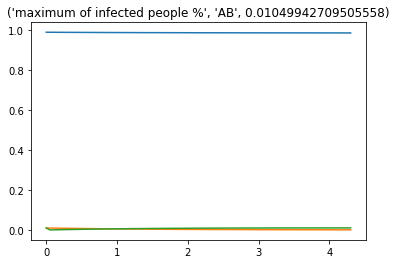

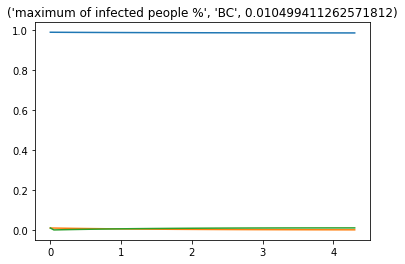

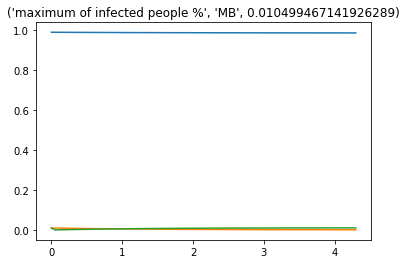

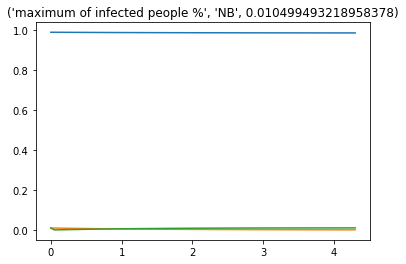

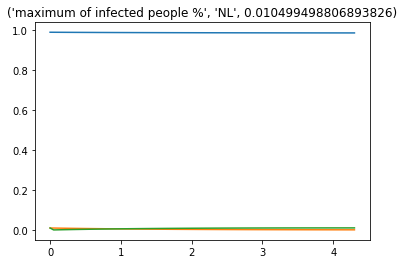

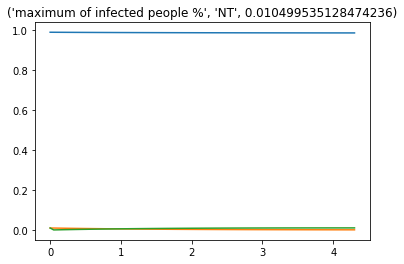

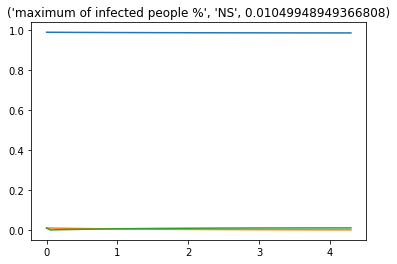

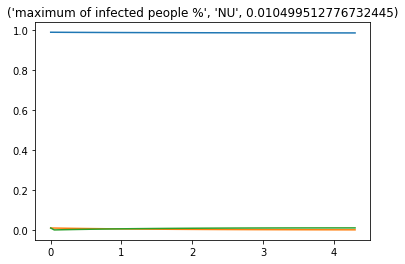

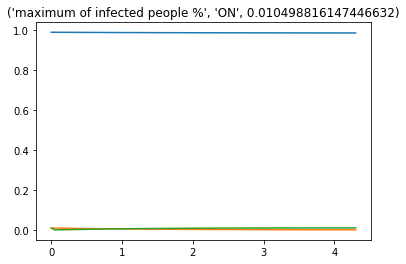

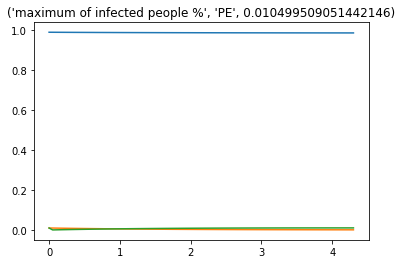

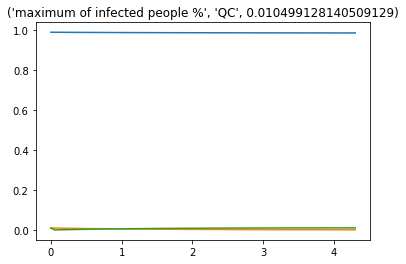

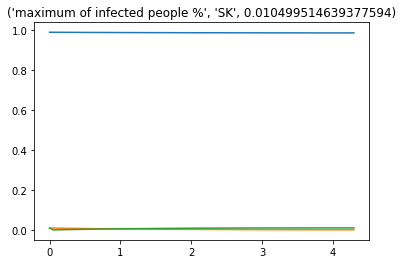

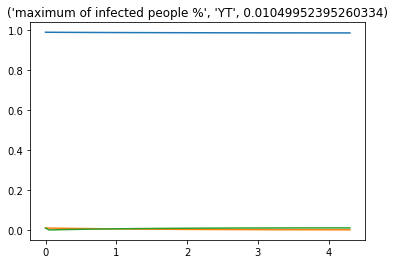

In [145]:
Sout, Eout, Iout = integrateSEI(theta,S0,E0,I0,dt,nt,L,p)

#xmin = 0; xmax = 2.5;
#ymin = 0; ymax = .2;

print(Sout,Eout,Iout)
#print(S0.dtype, E0.dtype, I0.dtype, L.dtype, S.dtype, E.dtype, I.dtype, Sout.dtype)
print(S0,E0)

Sm =  torch.zeros(nt+1, dtype = torch.float)
Em =  torch.zeros(nt+1, dtype = torch.float)
Im =  torch.zeros(nt+1, dtype = torch.float)

for n in range(13):
  for i in range(nt+1):
 
    Sm[i] = Sout[n,i]; Em[i] = Eout[n,i]; Im[i] = Iout[n,i]
  
  t = np.arange(nt+1)*dt
  title = 'maximum of infected people %', P[n], torch.max(Im).item()
  plt.figure(n)
  plt.title(title)
  plt.plot(t,Sm,t,Em,t,Im)

  #axes = plt.gca()
  #axes.set_xlim([xmin,xmax])
  #axes.set_ylim([ymin,ymax])

In [0]:
# the numbers it spits out are fractions of the population not total # of people
def SEImodel(theta,S,E,I,L,p):
    
    dSdt = torch.zeros(13, dtype = torch.float)
    dEdt = torch.zeros(13, dtype = torch.float)
    dIdt = torch.zeros(13, dtype = torch.float)

    alpha = theta[0]; beta  = theta[1]; gamma = theta[2]; mu    = theta[3]; kE    = theta[4]; kS    = theta[5]; kI    = theta[6]

    # #Method 1
    # dSdt = -kS*torch.mv(L,S) - beta*(E*S) - gamma*I*S               
    # dEdt = -kE*torch.mv(L,E) + beta*E*S + gamma*I*S - alpha*E     
    # dIdt = -kI*torch.mv(L,I) + alpha*E - mu*I                      

    #Method 2
    dSdt  = -kS*torch.mv(L,S*p) - beta*(E*S) - gamma*(I*S)                # dS/dt
    dEdt  = -kE*torch.mv(L,E*p) + beta*(E*S) + gamma*(I*S) - alpha*E      # dE/dt
    dIdt  = -kI*torch.mv(L,I*p) + alpha*E - mu*I                       # dI/dt
    
    return dSdt, dEdt, dIdt,

In [0]:
def integrateSEI(theta,S0,E0,I0,dt,nt,L,p):
    
    # tensors to save the results over time
    Souti = torch.zeros(13,nt+1, dtype = torch.float)
    Eouti = torch.zeros(13,nt+1, dtype = torch.float)
    Iouti = torch.zeros(13,nt+1, dtype = torch.float)
    # dSdt = torch.zeros(13, dtype = torch.float)
    # dEdt = torch.zeros(13, dtype = torch.float)
    # dIdt = torch.zeros(13, dtype = torch.float)
    Si = torch.zeros(13, dtype = torch.float)
    Ei = torch.zeros(13, dtype = torch.float)
    Ii = torch.zeros(13, dtype = torch.float)
    
    for i in range(13):
        Souti[i,0] = S0[i]
        Eouti[i,0] = E0[i]
        Iouti[i,0] = E0[i]
    
    Si = S0; Ei = E0; Ii = I0
    for i in range(nt):
        
        dSdt, dEdt, dIdt = SEImodel(theta,Si,Ei,Ii,L,p)
        Si = Si + dt*dSdt
        Ei = Ei + dt*dEdt
        Ii = Ii + dt*dIdt
        
        for n in range(13):
          Souti[n,i+1] = Si[n]; Eouti[n,i+1] = Ei[n]; Iouti[n,i+1] = Ii[n]
        
    return Souti, Eouti, Iouti

In [0]:
def loss(theta,Iobs,dt,nt,L,p):
    
    Scomp, Ecomp, Icomp = integrateSEI(theta,S0,E0,I0,dt,nt,L,p) #comp is computed from code with a chosen beta, gamma 
    
    phi = torch.sum((Icomp-Iobs)**2) #if comp and obs is the same then phi goes to zero
    
    return phi


In [157]:

#Assumed value for Eobs
Eobs = torch.zeros(13,87)
for g in range(13):
  for h in range(87):
    Eobs[g,h] = 0.015
#Value for Sobs
Icomp = integrateSEI(theta,S0,E0,I0,dt,nt,L,p)
p = torch.tensor(2)
p = loss(theta,Eobs,Iobs,dt,nt,L,p)
print(p)

x = torch.tensor(theta, requires_grad=True)
grad = x.grad

tensor(2.6527)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()


In [162]:
    alpha = torch.rand(1, requires_grad=True)
    beta  = torch.rand(1, requires_grad=True)
    gamma = torch.rand(1, requires_grad=True)
    mu    = torch.rand(1, requires_grad=True)
    kE    = torch.rand(1, requires_grad=True)
    kS    = torch.rand(1, requires_grad=True)
    kI    = torch.rand(1, requires_grad=True)

    num_iter = 100
    my = 0.001

    theta = torch.tensor([alpha, beta, gamma, mu, kE, kS, kI])
    y = torch.tensor(beta,alpha)

    for i in range(num_iter):

      y = loss(theta,Iobs,dt,nt,L,p)
      print(y)
    
      y.backward()
  
      if (i < 100) or (i%100 == 0):
        print('Iter: %4d,   Loss: %6.4f, alpha: %6.4f, beta: %6.4f, gamma: %6.4f, kE: %6.4f, kS: %6.4f, kI: %6.4f' % (i, y.item(), alpha.item(), beta.item(), gamma.item(), kE.item(), kS.item(), kI.item()))

      with torch.no_grad():
        dy_dalpha = alpha.grad
        dy_dbeta = beta.grad
        dy_dgamma = gamma.grad
        dy_dmu = mu.grad
        dy_dkE = kE.grad
        dy_dkS = kS.grad
        dy_dkI = kI.grad

        alpha.data = alpha - my*dy_dalpha
        beta.data   = beta - my*dy_dbeta
        gamma.data  = gamma - my*dy_dgamma
        mu.data    = mu - my*dy_dmu
        kE.data    = kE - my*dy_dkE
        kS.data     = kS - my*dy_dkS
        kI.data    = kI - my*dy_dkI
      
        alpha.grad.fill_(0.0)
        beta.grad.fill_(0.0)
        gamma.grad.fill_(0.0)
        mu.grad.fill_(0.0)
        kE.grad.fill_(0.0)
        kS.grad.fill_(0.0)
        kI.grad.fill_(0.0)

TypeError: ignored

# TEST MAIN - Everything Beyond here is absolutely useless and was just created to test the functions

In [0]:
S = torch.zeros(13, dtype = torch.float)
E = torch.zeros(13, dtype = torch.float)
I = torch.zeros(13, dtype = torch.float)
Souti = torch.zeros(13,nt+1, dtype = torch.float)
Eouti = torch.zeros(13,nt+1, dtype = torch.float)
Iouti = torch.zeros(13,nt+1, dtype = torch.float)

FE = 0.01     # Fraction of population that is initially exposed

# S0 = S0.fill_(1 - FE)       # Initializes Susceptible
# E0 = E0.fill_(FE)     # Initializes Exposed      

S = (prov/cad)*(1-FE)
E = (prov/cad)*FE

print(S,E)

In [0]:
# Si = S; Ei = E; Ii = I
# for i in range(nt):
        
#     dSdt, dEdt, dIdt = SEImodel(theta,Si,Ei,Ii,L)
    
#     print(dSdt,dEdt,dIdt)
    
#     Si = Si + dt*dSdt
#     Ei = Ei + dt*dEdt
#     Ii = Ii + dt*dIdt
        
#     for n in range(13):
#         Souti[n,i+1] = Si[n]; Eouti[n,i+1] = Ei[n]; Iouti[n,i+1] = Ii[n]

torch.set_printoptions(profile = "default")
# print(Sout[:1,:])

# JUNK

In [0]:
# provpop = torch.tensor([4413146, 5110917, 1377517, 779993, 521365, 44904, 977457, 39097, 14711827, 158158, 8537674, 1181666, 41078])

# S = torch.zeros(13, dtype = float)
# E = torch.zeros(13, dtype = float)
# I = torch.zeros(13, dtype = float)

# FE = 0.01     # Fraction of population that is initially exposed

# # Initializes Susceptible
# for i in range(13):
#   S[i] = 1 - FE
#   E[i] = FE

# alpha = 0.6
# beta  = 0.2
# gamma = 0.1
# mu    = 0.021
# kE    = 0.0
# kS    = 0
# kI    = 0
# theta = torch.tensor([alpha, beta, gamma, mu, kE, kS, kI])

# # dSdt, dEdt, dIdt = SEImodel(theta,S,E,I,p)

# print(S)

In [0]:
# tensors to save the results over time
    #Sout = torch.zeros(13,nt+1, dtype = torch.float)
    # Eout = torch.zeros(13,nt+1, dtype = torch.float)
    # Iout = torch.zeros(13,nt+1, dtype = torch.float)
    # S = torch.zeros(13, dtype = torch.float)
    # E = torch.zeros(13, dtype = torch.float)
    # I = torch.zeros(13, dtype = torch.float)
    
    # for i in range(13):
    #     Sout[i,0] = S0[i]
    #     Eout[i,0] = E0[i]
    #     Iout[i,0] = E0[i]

    #     S[i] = S0[i]; E[i] = E0[i]; I[i] = I0[i]
    
    # S = S0[i]; E = E0[i]; I = I0[i]
    # for i in range(nt):
        
    #     dSdt, dEdt, dIdt = SEImodel(theta,S,E,I)
    #     S += dt*dSdt
    #     E += dt*dEdt
    #     I += dt*dIdt
        
    #     for n in range(13):
    #         Sout[n,i+1] = S[n]; Eout[n,i+1] = E[n]; Iout[n,i+1] = I[n]

In [0]:
# dSdt, dEdt, dIdt = SEImodel(theta,S,E,I,p)

# print(dSdt, dEdt, dIdt)

In [0]:
# # province = [abrev, population, # of initial infections, time between first case in Canada and first case in province]

# AB = ['AB', 4413146, 1, 37]
# BC = ['BC', 5110917, 1, 0]
# MB = ['MB', 1377517, 1, 42]
# NB = ['NB', 779993, 1, 42]
# NL = ['NL', 521365, 1, 48]
# NT = ['NT', 44904, 1, 50]
# NS = ['NS', 977457, 1, 47]
# NU = ['NU', 39097, 0, 0]
# ON = ['ON', 14711827, 3, 0]
# PE = ['PE', 158158, 1, 44]
# QC = ['QC', 8537674, 1, 30]
# SK = ['SK', 1181666, 1, 45]
# YT = ['YT', 41078, 2, 52]

# Provinces = [ AB, BC, MB, NB, NL, NT, NS, NU, ON, PE, QC, SK, YT ]

# # provdelay = [0]*13

# for i in range(13):
#   #prov = Provinces[i]
#   #provdelay[i] = prov[3]

# #print(provdelay)